##### Set Working Directory

In [1]:
import os
os.getcwd()

'd:\\Python_MachineLearning_Proj\\Regression'

In [2]:
os.chdir(r"C:\Users\thars\Downloads\instagramReach")

##### Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [4]:
# Load dataset
data = pd.read_csv(r"C:\Users\thars\Downloads\instagramReach\Instagram data.csv", encoding="latin1")
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [5]:
# checking null values if dataset contains
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
# let's look at the insights of the columns understand the  data type of all the columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


##### Analyzing the Instagram reach

C:\Users\thars\AppData\Local\Temp\ipykernel_8704\3667718640.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Home"], kde_kws={"lw": 3}, hist_kws={"alpha": 0.25})


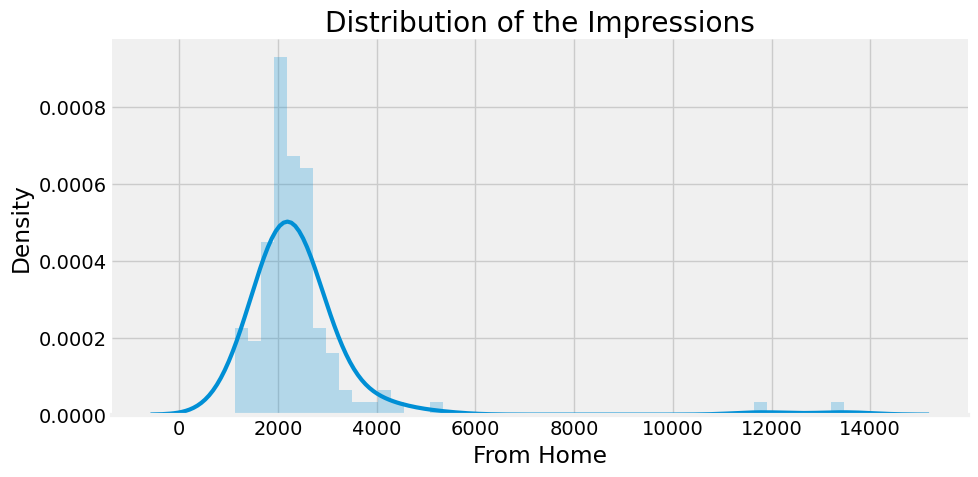

In [7]:
# Let's look at the distribution of the impression from home
plt.figure(figsize=(10, 5))
plt.style.use("fivethirtyeight")
plt.title("Distribution of the Impressions")
sns.distplot(data["From Home"], kde_kws={"lw": 3}, hist_kws={"alpha": 0.25})
sns.despine(left=True)
#plt.xlabel("")
#plt.ylabel("")
#plt.yticks([])
plt.tight_layout()

C:\Users\thars\AppData\Local\Temp\ipykernel_8704\2290562183.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Hashtags"], kde_kws={"lw":3}, hist_kws={"alpha":0.50})


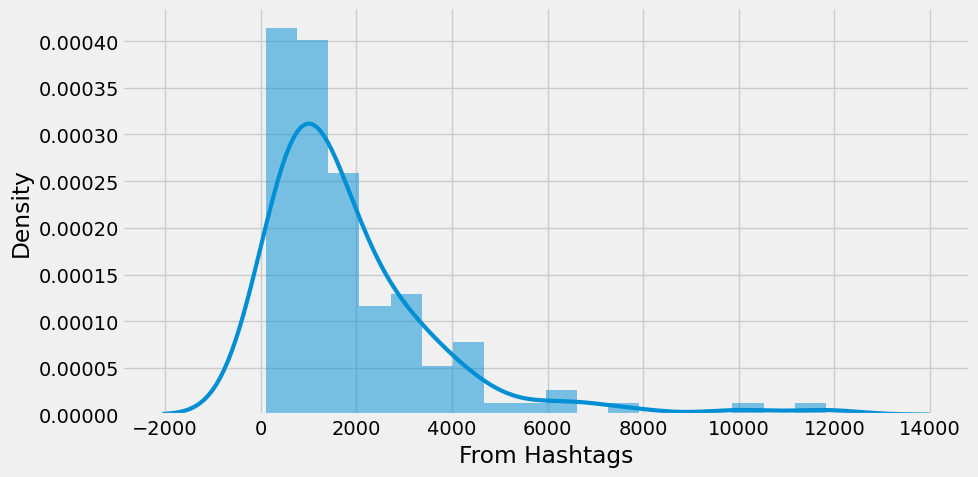

In [8]:
# Now let's look at the impressions i get from hastags
plt.figure(figsize=(10, 5))
plt.style.use = ("fivethirtyeight")
sns.distplot(data["From Hashtags"], kde_kws={"lw":3}, hist_kws={"alpha":0.50})
sns.despine(left=True)
plt.tight_layout()

C:\Users\thars\AppData\Local\Temp\ipykernel_8704\3891865143.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["From Explore"], kde_kws={"lw":3}, hist_kws={"alpha":0.50})


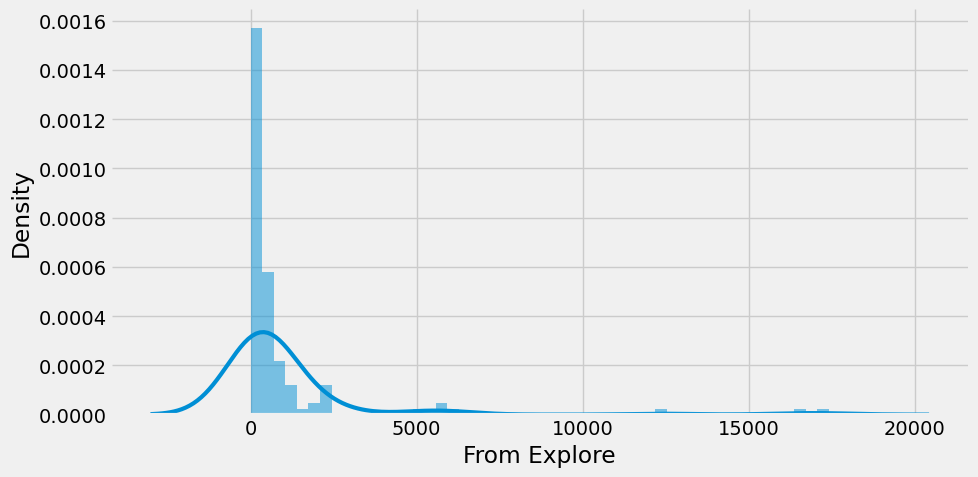

In [9]:
# Now let's look at the distribution of impressions i have received from explore section of the instagram
plt.figure(figsize=(10, 5))
sns.distplot(data["From Explore"], kde_kws={"lw":3}, hist_kws={"alpha":0.50})
sns.despine(left=True)
plt.tight_layout()

In [10]:
# Now let's look at the percentage of impressions i get from various sources of instagram
home = data["From Home"].sum()
hashtag = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ["home", "hashtag", "explore", "other"]
values = [home, hashtag, explore, other]
#colors = ["green", "pink", "turquoise", "red"]

fig = px.pie(data, values=values, names=labels, hole=0.5, #color_discrete_sequence=colors,
             title="Impressions on Instagram Posts From Various Sources")
fig.show()

##### Analyze Content

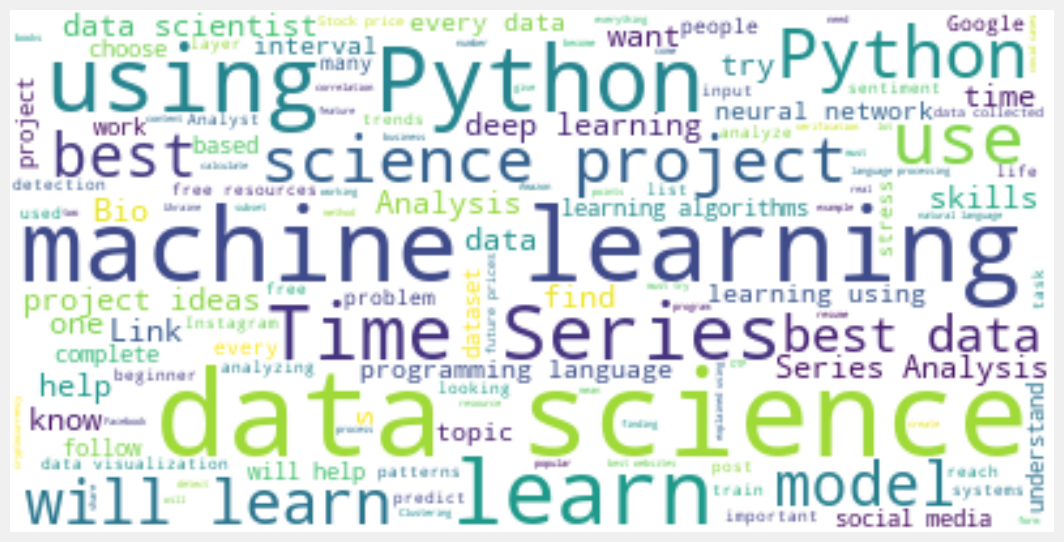

In [11]:
# Let's create a wordcloud of the caption column to look at the most used words in the caption of istagram post
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

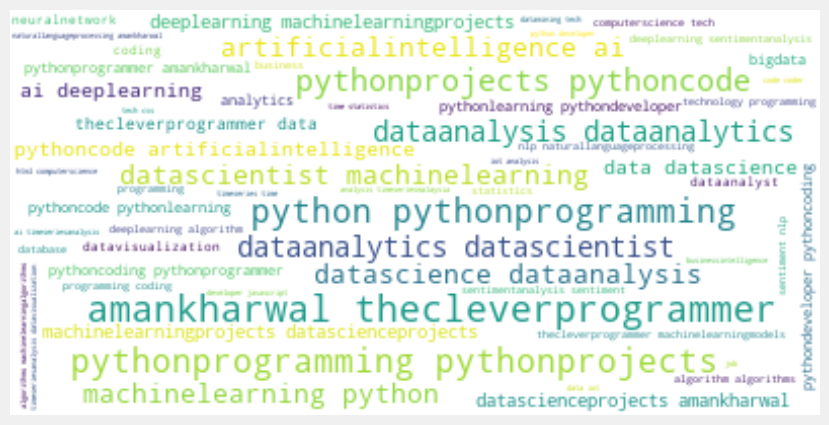

In [12]:
# Let's Create a wordcloud of the hashtag column to look at the most used hashtags in instagram post
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Analyzing the Relationships

In [13]:
# Let's have a look at the Relationship between number of Likes and number of Impressions on instagram post
fig = px.scatter(data_frame=data,
                 x="Impressions",
                 y="Likes", size="Likes", trendline="ols",
                 title="Relationship Between Likes and Impressions")
fig.update_traces(marker=dict(color="red"))
fig.show()

In [14]:
# Now let's check the relationship between comments and impressions
fig = px.scatter(data, x="Impressions", 
                 y="Comments", size="Comments", trendline="ols",
                 title="Relationship Between Comments and Impressions")
fig.update_traces(marker=dict(color="purple"))
fig.show()

In [15]:
# Let's Check the relationship of shares and impressions
fig = px.scatter(data_frame=data,
                 x="Impressions",
                 y="Shares", size="Shares", trendline="ols",
                 title="Relationship Between Shares and Impressions")
fig.update_traces(marker=dict(color="green"))
fig.show()

In [16]:
#  Now let’s have a look at the relationship between the number of saves and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [17]:
# let’s have a look at the correlation of all the columns with the Impressions column:
numerical_cols = data.select_dtypes(include=["number"])
correlation_matrix = numerical_cols.corr()
print(correlation_matrix["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


##### Analyzing Conversion Rate

In [18]:
# conversion rate formula is (Follows / profile_Visits) * 100
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [19]:
# Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:
figure = px.scatter(data_frame = data, x=data["Profile Visits"],
                    y=data["Follows"], size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
#fig.update_traces(marker=dict(color="chocolate"))
fig.show()

##### Instagram Reach Prediction Model

In [39]:
# i will train a machine learning model to predict the reach of instagram post
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

# train a machine learning model
model = PassiveAggressiveRegressor(random_state=42)
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8231076036356828

In [46]:
# Let's Predic the instagram reach by giving inputs
# features = [[" Likes, "Saves", "Comments", "Shares", "Profile Visits", "Follows"]]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([10203.2014204])

In [21]:
data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')